# Kelompok Chitato Lite

1. A. Salky Maulana | 22.11.5321
2. Billy Faza Irawan | 22.11.5330
3. Sukma Apri Ananda Putra | 22.11.5348

# **1.	Berdasarkan apa yang sudah Anda pelajari, silahkan gunakan kemampuan anda untuk menyelesaikan sebuah menggunakan classification yang melibatkan penggunaan Machine Learning.**

**A. Pilih satu bidang yang Anda beserta rekan tim minati, jabarkan alasan pemilihan bidang tersebut dan jelaskan apa yang ingin dicapai dengan memilih topik ini.**

Topik ini kami pilih untuk memahami bagaimana gangguan mental mempengaruhi berbagai aspek kehidupan pasien, seperti emosi, hubungan sosial, dan kesejahteraan fisik. Selain itu, dataset ini memberikan wawasan tentang pola perasaan dan perilaku yang mungkin menunjukkan adanya gangguan mental tertentu. Dengan menganalisis data ini, kami harap bisa menemukan pola yang dapat membantu dalam diagnosis lebih cepat dan lebih akurat bagi individu dengan masalah mental. Tujuannya adalah untuk menyelesaikan tugas akhir matkul Big Data Prediktif Analitik Lanjut(BDPL) sekaligus untuk menyelidiki keterkaitan antara gejala yang dialami pasien dan diagnosis yang diberikan, serta memahami bagaimana faktor emosional dan psikologis saling berinteraksi.

**B. Ceritakan proses mendapatkan data dan informasi lengkap mengenai data tersebut (seperti waktu, penjelasan setiap kolom, sumber dll). Data yang digunakan harus data terbaru dengan range 1-4 tahun kebelakang.**

Proses mendapatkan data:

Dataset ini diperoleh dari sumber terbuka seperti Kaggle, yang merupakan platform berbagi data untuk keperluan pembelajaran dan penelitian. Dataset ini diupload di platform kagle pada rentang waktu 1 tahun yang lalu dan dikumpulkan melalui wawancara atau kuesioner yang diisi oleh pasien atau profesional kesehatan terkait gangguan mental. Data yang ada mencakup laporan tentang perasaan emosional, perilaku, serta diagnosis yang diberikan oleh tenaga medis profesional.

Penjelasan Setiap Kolom:

*   Patient Number: Nomor unik untuk setiap pasien, digunakan untuk membedakan setiap entri.
*   Sadness: Frekuensi perasaan sedih yang dialami pasien (contoh: "Usually", "Sometimes", "Seldom").
*   Euphoric: Frekuensi perasaan euforia yang dialami pasien (contoh: "Most-Often", "Seldom").
*   Exhausted: Tingkat kelelahan emosional atau fisik pasien (contoh: "Usually", "Sometimes").
*   Sleep dissorder: Indikasi gangguan tidur yang dialami pasien (contoh: "Usually", "Seldom").
*   Mood Swing: Adanya perubahan suasana hati secara tiba-tiba (YES = Ada, NO = Tidak Ada).
*   Suicidal thoughts: Pikiran untuk bunuh diri yang pernah dialami pasien (YES = Ada, NO = Tidak Ada).
*   Anorxia: Indikasi adanya anoreksia pada pasien (YES = Ada, NO = Tidak Ada).
*   Authority Respect: Tingkat penghormatan pasien terhadap otoritas atau aturan (YES = Menghormati, NO = Tidak Menghormati).
*   Try-Explanation: Kemauan pasien untuk mencoba menjelaskan masalah atau perasaannya (YES = Bersedia, NO = Tidak Bersedia).
*   Aggressive Response: Respon agresif pasien terhadap situasi tertentu (YES = Ada, NO = Tidak Ada).
*   Ignore & Move-On: Kemampuan pasien untuk mengabaikan masalah dan melanjutkan hidup (YES = Bisa, NO = Tidak Bisa).
*   Nervous Break-down: Adanya pengalaman gangguan saraf (YES = Pernah, NO = Tidak Pernah).
*   Admit Mistakes: Kesediaan pasien untuk mengakui kesalahan (YES = Bersedia, NO = Tidak Bersedia).
*   Overthinking: Seberapa sering pasien mengalami overthinking (YES = Sering, NO = Tidak Sering).
*   Sexual Activity: Tingkat aktivitas seksual pasien, dinilai dengan skala 1-10.
*   Concentration: Tingkat kemampuan pasien untuk berkonsentrasi, dinilai dengan skala 1-10.
*   Optimisim: Tingkat optimisme pasien, dinilai dengan skala 1-10.
*   Expert Diagnose: Diagnosis ahli terhadap kondisi pasien, seperti "Bipolar Type-2", "Depression", atau "Normal".Item daftar




**C. Lakukan pre-processing data dengan memeriksa tipe data, mengganti nama kolom, memeriksa nilai null, mengubah tipe data (agar bisa di proses), menampilkan summary, dan menampilkan matriks korelasinya menggunakan metode metode yang pernah dipelajari.**

In [ ]:
!pip install pyspark
!pip install scikit-learn

Kode dibawah ini untuk mengimpor library SparkSession dan functions dari pyspark.sql serta matplotlib.pyplot untuk visualisasi data. Kemudian, ia membuat SparkSession dengan nama 'ml-mentalDisorder'.

Selanjutnya, kode tersebut membaca file CSV 'Dataset-Mental-Disorders.csv' ke dalam DataFrame Spark bernama 'mental_dis' dan menampilkan 5 baris pertama dari DataFrame.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('ml-mentalDisorder').getOrCreate()
mental_dis = spark.read.csv('/content/Dataset-Mental-Disorders.csv', header = True, inferSchema = True)
mental_dis.show(5)

+--------------+---------+----------+---------+---------------+----------+-----------------+-------+-----------------+---------------+-------------------+----------------+------------------+--------------+------------+---------------+-------------+---------+---------------+
|Patient Number|  Sadness|  Euphoric|Exhausted|Sleep dissorder|Mood Swing|Suicidal thoughts|Anorxia|Authority Respect|Try-Explanation|Aggressive Response|Ignore & Move-On|Nervous Break-down|Admit Mistakes|Overthinking|Sexual Activity|Concentration|Optimisim|Expert Diagnose|
+--------------+---------+----------+---------+---------------+----------+-----------------+-------+-----------------+---------------+-------------------+----------------+------------------+--------------+------------+---------------+-------------+---------+---------------+
|    Patiant-01|  Usually|    Seldom|Sometimes|      Sometimes|       YES|             YES |     NO|               NO|            YES|                 NO|              NO|    

# Memeriksa Tipe Data
Kode dibawah ini untuk memeriksa Tipe Data, Tujuannya untuk memastikan semua kolom memiliki tipe data yang sesuai (misalnya, numerik, kategorikal, atau string). Alasannya karena Analisis statistik dan visualisasi memerlukan tipe data yang sesuai. Kesalahan tipe data dapat menyebabkan error atau hasil yang tidak valid.

In [ ]:
mental_dis.show(5)

+--------------+---------+----------+---------+---------------+----------+-----------------+-------+-----------------+---------------+-------------------+----------------+------------------+--------------+------------+---------------+-------------+---------+---------------+
|Patient Number|  Sadness|  Euphoric|Exhausted|Sleep dissorder|Mood Swing|Suicidal thoughts|Anorxia|Authority Respect|Try-Explanation|Aggressive Response|Ignore & Move-On|Nervous Break-down|Admit Mistakes|Overthinking|Sexual Activity|Concentration|Optimisim|Expert Diagnose|
+--------------+---------+----------+---------+---------------+----------+-----------------+-------+-----------------+---------------+-------------------+----------------+------------------+--------------+------------+---------------+-------------+---------+---------------+
|    Patiant-01|  Usually|    Seldom|Sometimes|      Sometimes|       YES|             YES |     NO|               NO|            YES|                 NO|              NO|    

Output ini adalah hasil dari perintah mental_dis.printSchema() yang menunjukkan struktur DataFrame mental_dis dalam PySpark. DataFrame ini memiliki 19 kolom, masing-masing dengan tipe data string, dan semua kolom dapat memiliki nilai kosong (nullable = true). Kolom-kolomnya mencakup berbagai atribut terkait kondisi mental, seperti Sadness, Mood Swing, Suicidal thoughts, dan Concentration, yang mungkin berisi data deskriptif atau kategori. Struktur ini menunjukkan bahwa data dalam DataFrame adalah teks (string) yang dapat dianalisis lebih lanjut.

In [ ]:
mental_dis.printSchema()

root
 |-- Patient Number: string (nullable = true)
 |-- Sadness: string (nullable = true)
 |-- Euphoric: string (nullable = true)
 |-- Exhausted: string (nullable = true)
 |-- Sleep dissorder: string (nullable = true)
 |-- Mood Swing: string (nullable = true)
 |-- Suicidal thoughts: string (nullable = true)
 |-- Anorxia: string (nullable = true)
 |-- Authority Respect: string (nullable = true)
 |-- Try-Explanation: string (nullable = true)
 |-- Aggressive Response: string (nullable = true)
 |-- Ignore & Move-On: string (nullable = true)
 |-- Nervous Break-down: string (nullable = true)
 |-- Admit Mistakes: string (nullable = true)
 |-- Overthinking: string (nullable = true)
 |-- Sexual Activity: string (nullable = true)
 |-- Concentration: string (nullable = true)
 |-- Optimisim: string (nullable = true)
 |-- Expert Diagnose: string (nullable = true)



# Mengganti Nama Kolom
Kami meyesuaikan nama kolom tujuannya untuk memberikan nama kolom yang lebih deskriptif atau konsisten.Nama kolom yang rapi mempermudah pemahaman data dan menghindari kebingungan selama proses analisis.

In [ ]:
mental_dis = mental_dis.withColumnRenamed("Patient Number", "NomorPasien") \
       .withColumnRenamed("Sadness", "Kesedihan") \
       .withColumnRenamed("Euphoric", "Euforia") \
       .withColumnRenamed("Exhausted", "Kelelahan") \
       .withColumnRenamed("Sleep dissorder", "GangguanTidur") \
       .withColumnRenamed("Mood Swing", "PerubahanMood") \
       .withColumnRenamed("Suicidal thoughts", "PikiranBunuhDiri") \
       .withColumnRenamed("Anorxia", "Anoreksia") \
       .withColumnRenamed("Authority Respect", "MenghormatiOtoritas") \
       .withColumnRenamed("Try-Explanation", "CobaMenjelaskan") \
       .withColumnRenamed("Aggressive Response", "ResponAgresif") \
       .withColumnRenamed("Ignore & Move-On", "Abaikan&Lanjutkan") \
       .withColumnRenamed("Nervous Break-down", "GangguanSyaraf") \
       .withColumnRenamed("Admit Mistakes", "MengakuiKesalahan") \
       .withColumnRenamed("Overthinking", "BerpikirBerlebihan") \
       .withColumnRenamed("Sexual Activity", "AktivitasSeksual") \
       .withColumnRenamed("Concentration", "Konsentrasi") \
       .withColumnRenamed("Optimisim", "Optimisme") \
       .withColumnRenamed("Expert Diagnose", "DiagnosaAhli")
mental_dis.show(5)

+-----------+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+--------------+
|NomorPasien|Kesedihan|   Euforia|Kelelahan|GangguanTidur|PerubahanMood|PikiranBunuhDiri|Anoreksia|MenghormatiOtoritas|CobaMenjelaskan|ResponAgresif|Abaikan&Lanjutkan|GangguanSyaraf|MengakuiKesalahan|BerpikirBerlebihan|AktivitasSeksual|Konsentrasi|Optimisme|  DiagnosaAhli|
+-----------+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+--------------+
| Patiant-01|  Usually|    Seldom|Sometimes|    Sometimes|          YES|            YES |       NO|                 NO|            YES|           NO|               NO|           

Kode mental_dis.describe().show() menampilkan ringkasan statistik dari DataFrame mental_dis, termasuk jumlah data non-null (semua kolom memiliki 120 entri), nilai minimum, dan maksimum untuk setiap kolom. Karena kolom berisi data kategoris berbasis teks (string), nilai rata-rata (mean) dan standar deviasi (stddev) tidak relevan dan ditampilkan sebagai NULL. Nilai minimum dan maksimum membantu memahami rentang kategori pada setiap atribut, seperti Kesedihan dari "Most-Often" hingga "Usually" dan DiagnosaAhli dari "Bipolar Type-1" hingga "Normal". Output ini berguna untuk eksplorasi awal data sebelum analisis lebih lanjut.

In [ ]:
mental_dis.describe().show()

+-------+-----------+----------+----------+----------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+--------------+
|summary|NomorPasien| Kesedihan|   Euforia| Kelelahan|GangguanTidur|PerubahanMood|PikiranBunuhDiri|Anoreksia|MenghormatiOtoritas|CobaMenjelaskan|ResponAgresif|Abaikan&Lanjutkan|GangguanSyaraf|MengakuiKesalahan|BerpikirBerlebihan|AktivitasSeksual|Konsentrasi|Optimisme|  DiagnosaAhli|
+-------+-----------+----------+----------+----------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+--------------+
|  count|        120|       120|       120|       120|          120|          120|             120|      120|                120|            120|   

# Memeriksa Nilai Null
Pemeriksaan nilai null dilakukan untuk mengidentifikasi data yang hilang, yang dapat memengaruhi analisis dan pemodelan. Karena tidak ditemukan data yang hilang, tidak ada tindakan lanjutan yang diambil selain menghapus kolom 'NomorPasien' yang kami anggap tidak diperlukan.

In [ ]:
from pyspark.sql.functions import col, when, count

mental_dis.select([count(when(col(c).isNull(), c)).alias(c) for c in mental_dis.columns]).show()
mental_dis = mental_dis.drop('NomorPasien')

+-----------+---------+-------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|NomorPasien|Kesedihan|Euforia|Kelelahan|GangguanTidur|PerubahanMood|PikiranBunuhDiri|Anoreksia|MenghormatiOtoritas|CobaMenjelaskan|ResponAgresif|Abaikan&Lanjutkan|GangguanSyaraf|MengakuiKesalahan|BerpikirBerlebihan|AktivitasSeksual|Konsentrasi|Optimisme|DiagnosaAhli|
+-----------+---------+-------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|          0|        0|      0|        0|            0|            0|               0|        0|                  0|              0|            0|                0|             0|              

Kode dibawah ini bertujuan untuk menghitung dan menampilkan jumlah nilai unik serta nilai unik itu sendiri untuk setiap kolom dalam DataFrame mental_dis.

In [ ]:
from pyspark.sql.functions import countDistinct

for column in mental_dis.columns:
    unique_count = mental_dis.select(countDistinct(column)).collect()[0][0] # Use select and countDistinct
    unique_values = mental_dis.select(column).distinct().rdd.flatMap(lambda x: x).collect() # Use select and distinct

    print(f"The number of unique values in {column}: {unique_count}")
    print(f"Unique values in {column}:")
    for value in unique_values:
          print(value)
    print('\n')

The number of unique values in Kesedihan: 4
Unique values in Kesedihan:
Sometimes
Usually
Most-Often
Seldom


The number of unique values in Euforia: 4
Unique values in Euforia:
Sometimes
Usually
Most-Often
Seldom


The number of unique values in Kelelahan: 4
Unique values in Kelelahan:
Sometimes
Usually
Most-Often
Seldom


The number of unique values in GangguanTidur: 4
Unique values in GangguanTidur:
Sometimes
Usually
Most-Often
Seldom


The number of unique values in PerubahanMood: 2
Unique values in PerubahanMood:
YES
NO


The number of unique values in PikiranBunuhDiri: 3
Unique values in PikiranBunuhDiri:
YES 
YES
NO


The number of unique values in Anoreksia: 2
Unique values in Anoreksia:
YES
NO


The number of unique values in MenghormatiOtoritas: 2
Unique values in MenghormatiOtoritas:
YES
NO


The number of unique values in CobaMenjelaskan: 2
Unique values in CobaMenjelaskan:
YES
NO


The number of unique values in ResponAgresif: 2
Unique values in ResponAgresif:
YES
NO


The

# Mengubah Tipe Data
Kode dibawah bertujuan untuk mengubah nilai-nilai pada kolom "DiagnosaAhli" dalam DataFrame mental_dis menjadi nilai numerik. Kami mengubah nilai-nilai kategorikal pada kolom "DiagnosaAhli" menjadi nilai numerik (0, 1, 2, 3) untuk memudahkan proses analisis dan pemodelan.

In [ ]:
import numpy as np
import pandas as pd
from pyspark.sql.functions import col, when

mental_dis = mental_dis.withColumn(
    "DiagnosaAhli",
    when(col("DiagnosaAhli") == "Normal", 0)
    .when(col("DiagnosaAhli") == "Bipolar Type-1", 1)
    .when(col("DiagnosaAhli") == "Bipolar Type-2", 2)
    .when(col("DiagnosaAhli") == "Depression", 3)
    .otherwise(col("DiagnosaAhli"))
)

mental_dis.show(5)

+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|Kesedihan|   Euforia|Kelelahan|GangguanTidur|PerubahanMood|PikiranBunuhDiri|Anoreksia|MenghormatiOtoritas|CobaMenjelaskan|ResponAgresif|Abaikan&Lanjutkan|GangguanSyaraf|MengakuiKesalahan|BerpikirBerlebihan|AktivitasSeksual|Konsentrasi|Optimisme|DiagnosaAhli|
+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|  Usually|    Seldom|Sometimes|    Sometimes|          YES|            YES |       NO|                 NO|            YES|           NO|               NO|           YES|              YES|               YES|       3 From

Kode dibawah untuk mengubah nilai-nilai pada kolom-kolom tertentu dalam DataFrame mental_dis yang berisi nilai "YES" dan "NO" menjadi nilai numerik 1 dan 0, serta melakukan casting tipe data kolom menjadi integer.

In [ ]:
from pyspark.sql.functions import col, when

yes_and_no_columns = ['PerubahanMood', 'PikiranBunuhDiri', 'Anoreksia', 'MenghormatiOtoritas', 'CobaMenjelaskan',
                      'ResponAgresif', 'Abaikan&Lanjutkan', 'GangguanSyaraf', 'MengakuiKesalahan', 'BerpikirBerlebihan']

for column in yes_and_no_columns:
    mental_dis = mental_dis.withColumn(
        column,
        when(col(column) == "YES", 1).otherwise(when(col(column) == "NO", 0).otherwise(col(column)))
    )
    #casting the column to integer type
    mental_dis = mental_dis.withColumn(column, col(column).cast("int"))

mental_dis.show(5)

+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|Kesedihan|   Euforia|Kelelahan|GangguanTidur|PerubahanMood|PikiranBunuhDiri|Anoreksia|MenghormatiOtoritas|CobaMenjelaskan|ResponAgresif|Abaikan&Lanjutkan|GangguanSyaraf|MengakuiKesalahan|BerpikirBerlebihan|AktivitasSeksual|Konsentrasi|Optimisme|DiagnosaAhli|
+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|  Usually|    Seldom|Sometimes|    Sometimes|            1|            NULL|        0|                  0|              1|            0|                0|             1|                1|                 1|       3 From

kode dibawah ini untuk mengekstrak nilai numerik dari kolom-kolom 'AktivitasSeksual', 'Konsentrasi', dan 'Optimisme' dalam DataFrame mental_dis yang awalnya tersimpan sebagai string, dan kemudian mengubah tipe data kolom-kolom tersebut menjadi integer.

In [ ]:
from pyspark.sql.functions import col, when, regexp_extract # Import regexp_extract

from_columns = ['AktivitasSeksual', 'Konsentrasi', 'Optimisme']  # Updated column names
for column in from_columns:
    mental_dis = mental_dis.withColumn(column, col(column).cast("string")).withColumn(column, regexp_extract(col(column), '(\d+)', 1).cast("int"))

mental_dis.show(5)

+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|Kesedihan|   Euforia|Kelelahan|GangguanTidur|PerubahanMood|PikiranBunuhDiri|Anoreksia|MenghormatiOtoritas|CobaMenjelaskan|ResponAgresif|Abaikan&Lanjutkan|GangguanSyaraf|MengakuiKesalahan|BerpikirBerlebihan|AktivitasSeksual|Konsentrasi|Optimisme|DiagnosaAhli|
+---------+----------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|  Usually|    Seldom|Sometimes|    Sometimes|            1|            NULL|        0|                  0|              1|            0|                0|             1|                1|                 1|             

kode dibawah kami gunakan untuk mengubah nilai-nilai kategorikal pada kolom 'Kesedihan', 'Euforia', 'Kelelahan', dan 'GangguanTidur' dalam DataFrame mental_dis menjadi nilai numerik (0, 1, 2, 3) sesuai dengan pemetaan yang telah ditentukan.

In [ ]:
from pyspark.sql.functions import col, when, create_map, lit
from itertools import chain # Import the chain function from itertools

frequency_columns = ['Kesedihan', 'Euforia', 'Kelelahan', 'GangguanTidur']  # Updated column names

# Create a mapping expression
mapping_expr = create_map([lit(x) for x in chain(*({'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}.items()))])

for column in frequency_columns:
    mental_dis = mental_dis.withColumn(column, mapping_expr.getItem(col(column)).cast("int"))

mental_dis.show(5)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/column.py:460: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


+---------+-------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|Kesedihan|Euforia|Kelelahan|GangguanTidur|PerubahanMood|PikiranBunuhDiri|Anoreksia|MenghormatiOtoritas|CobaMenjelaskan|ResponAgresif|Abaikan&Lanjutkan|GangguanSyaraf|MengakuiKesalahan|BerpikirBerlebihan|AktivitasSeksual|Konsentrasi|Optimisme|DiagnosaAhli|
+---------+-------+---------+-------------+-------------+----------------+---------+-------------------+---------------+-------------+-----------------+--------------+-----------------+------------------+----------------+-----------+---------+------------+
|        2|      0|        1|            1|            1|            NULL|        0|                  0|              1|            0|                0|             1|                1|                 1|               3|        

# EDA
EDA bertujuan untuk memahami karakteristik data sebelum melakukan pemodelan.

Adapun kode dibawah berfungsi Menampilkan statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, dan maksimum untuk setiap kolom numerik. Ini memberi gambaran umum tentang distribusi data.

In [ ]:
mental_dis.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+----------------+
|summary|         Kesedihan|           Euforia|         Kelelahan|     GangguanTidur|    PerubahanMood|   PikiranBunuhDiri|          Anoreksia|MenghormatiOtoritas|   CobaMenjelaskan|      ResponAgresif| Abaikan&Lanjutkan|    GangguanSyaraf|  MengakuiKesalahan|BerpikirBerlebihan|  AktivitasSeksual|       Konsentrasi|         Optimisme|    DiagnosaAhli|
+-------+------------------+------------------+------------------+------------------+-----------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+-------------

Kode dibawah untuk membuat heatmap yang memvisualisasikan matriks korelasi antar variabel.
Tujuannya agar kita bisa memahami hubungan linear antar variabel. Korelasi yang tinggi (mendekati 1 atau -1) menunjukkan hubungan yang kuat

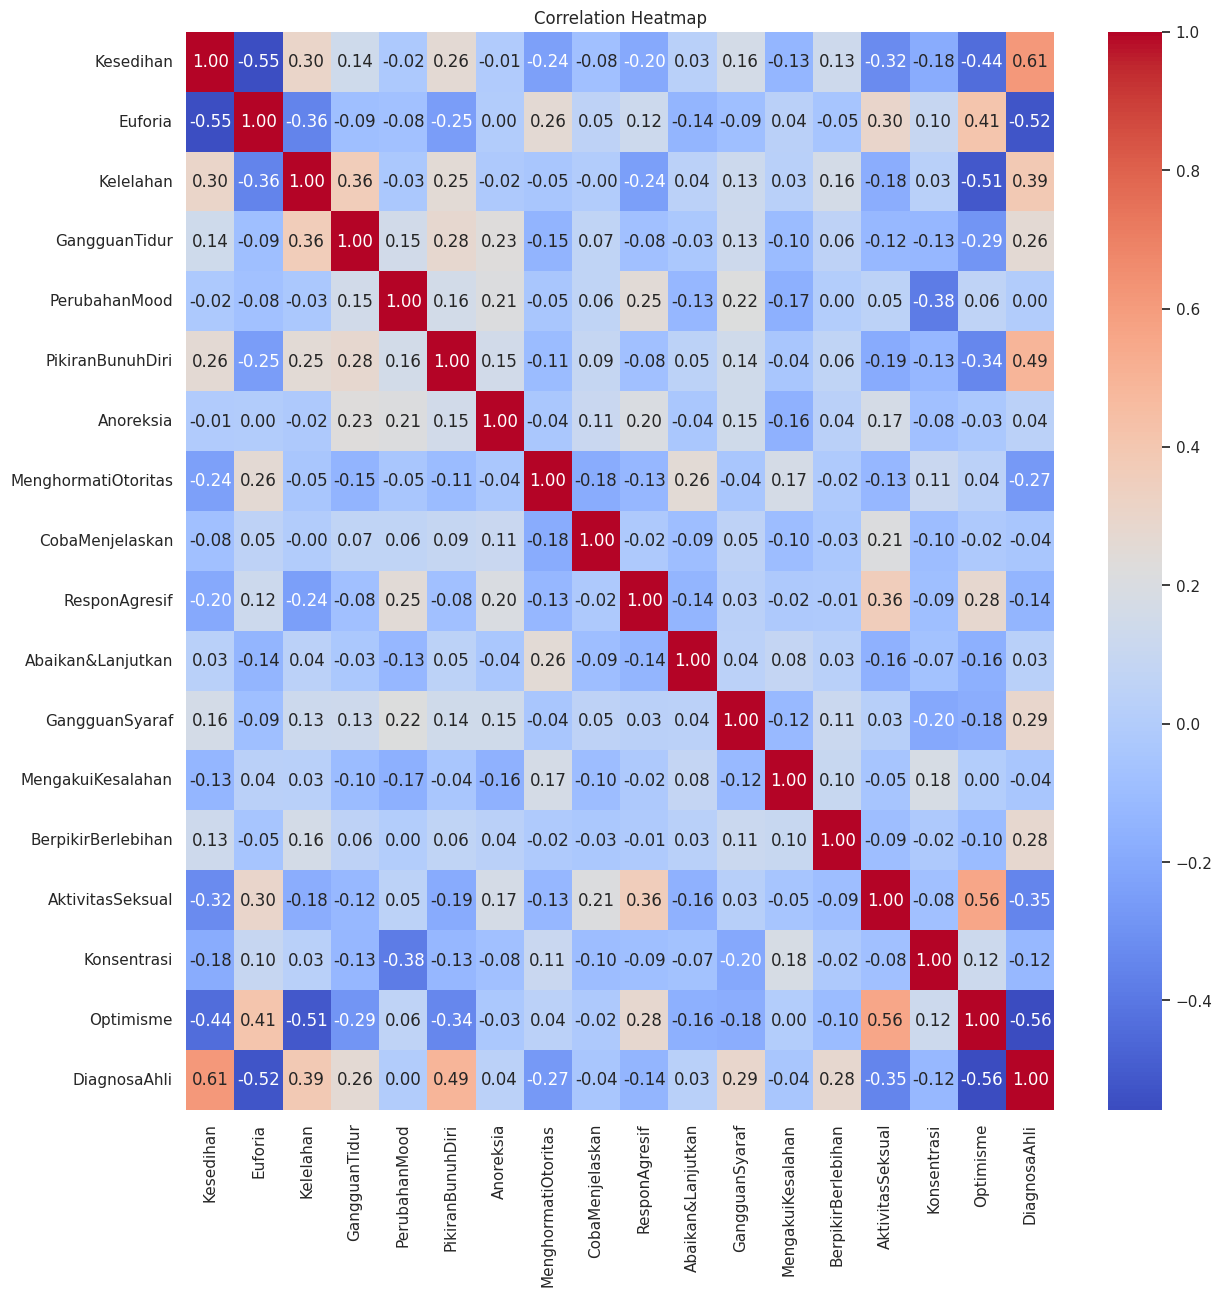

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

sns.set(style="whitegrid")

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = mental_dis.toPandas()

# Calculate the correlation matrix using the Pandas DataFrame
correlation_matrix = pandas_df.corr()

# create a heatmap
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

Kode dibawah ini kami gunakan untuk membuat countplot yang menunjukkan distribusi frekuensi "Kesedihan" untuk setiap level "DiagnosaAhli". tujuannya melihat bagaimana tingkat kesedihan bervariasi di antara kelompok diagnosa yang berbeda

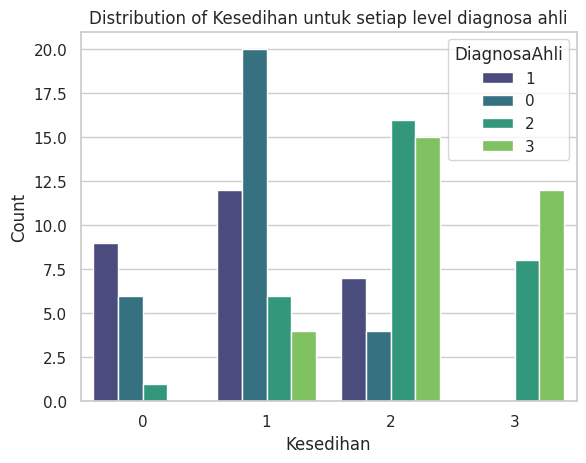

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

sns.set(style="whitegrid")

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = mental_dis.toPandas()

# Now use the Pandas DataFrame 'pandas_df' for plotting
sns.countplot(x='Kesedihan', hue='DiagnosaAhli', data=pandas_df, palette='viridis')
plt.title('Distribution of Kesedihan untuk setiap level diagnosa ahli')
plt.xlabel('Kesedihan')
plt.ylabel('Count')
plt.show()

kami membuat pie chart dengan kode dibawah ini yang menunjukkan proporsi setiap kategori dalam "DiagnosaAhli". Agardistribusi kelas target (diagnosa) bisa dipahami.

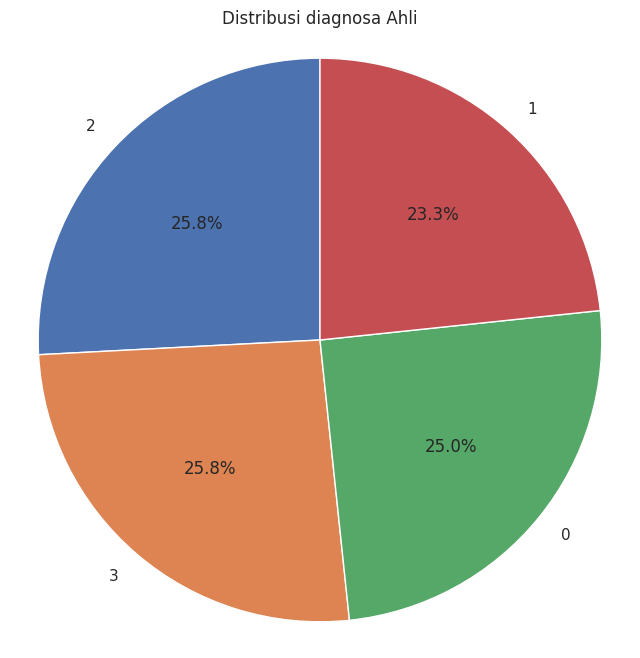

In [ ]:
import matplotlib.pyplot as plt

diagnosa_counts = pandas_df['DiagnosaAhli'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(diagnosa_counts, labels=diagnosa_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi diagnosa Ahli')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Kami membuat barplot yang membandingkan rata-rata "Optimisme" untuk setiap level "AktivitasSeksual", dipisahkan berdasarkan "DiagnosaAhli" dengan kode berikut.Yang bertujuan melihat hubungan antara optimisme dan aktivitas seksual, serta bagaimana hubungan ini dipengaruhi oleh diagnosa.

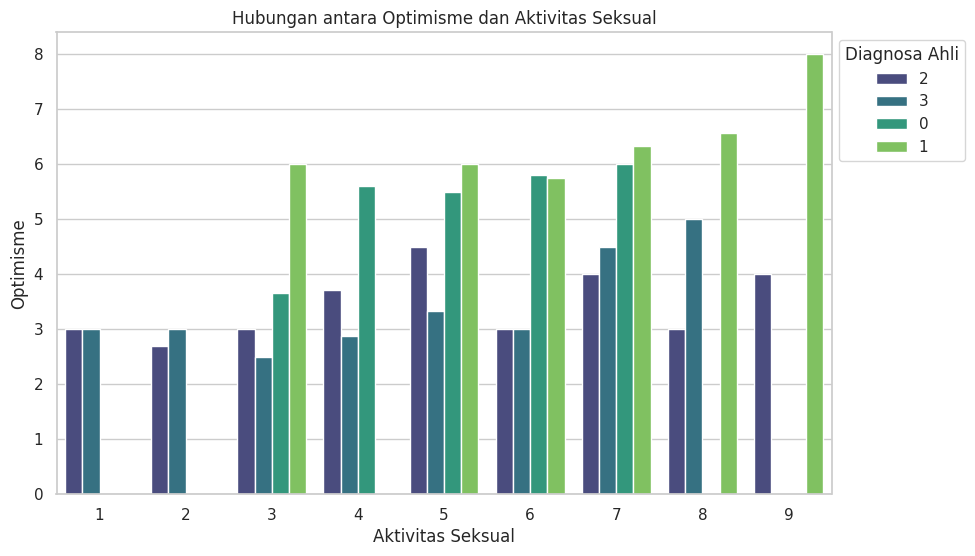

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Ubah DataFrame PySpark ke DataFrame Pandas sebelum plotting
pandas_df = mental_dis.toPandas()

# Sekarang gunakan DataFrame Pandas 'pandas_df' untuk plotting
sns.barplot(y='Optimisme', x='AktivitasSeksual', hue='DiagnosaAhli', data=pandas_df, errorbar=None, palette='viridis')
plt.title('Hubungan antara Optimisme dan Aktivitas Seksual')
plt.xlabel('Aktivitas Seksual')
plt.ylabel('Optimisme')

# Tempatkan legenda di sudut kanan atas plot, di luar area plot
plt.legend(title='Diagnosa Ahli', bbox_to_anchor=(1, 1))

plt.show()


kode dibawah kami gunakan untuk membuat scatter plot yang menunjukkan hubungan antara "AktivitasSeksual" dan "Optimisme", dengan warna titik yang berbeda untuk setiap "DiagnosaAhli". Dengan tujuan visualisasi hubungan antara dua variabel numerik dan melihat apakah ada pola yang berbeda untuk setiap diagnosa.

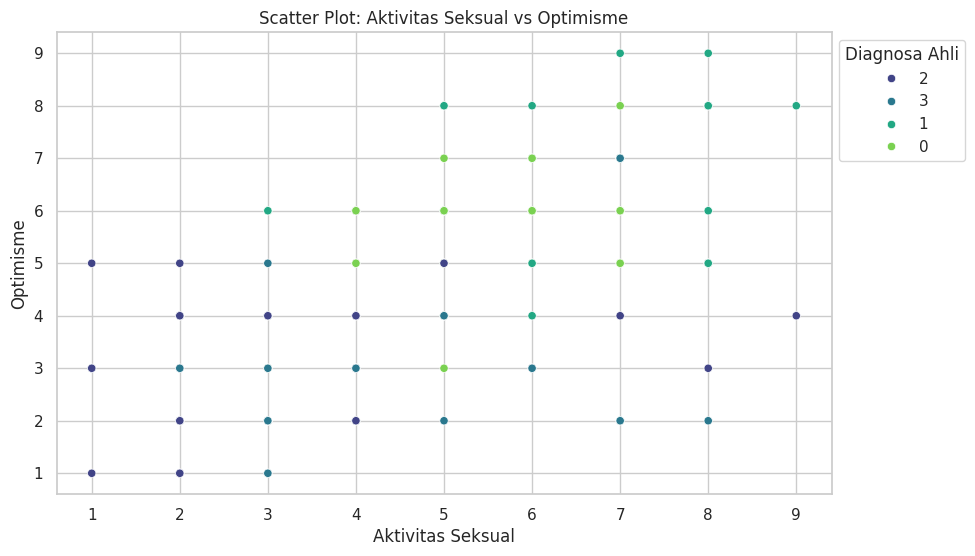

In [ ]:
plt.figure(figsize=(10, 6))

# Ubah DataFrame PySpark ke DataFrame Pandas sebelum plotting
pandas_df = mental_dis.toPandas()

# Buat scatter plot
sns.scatterplot(x='AktivitasSeksual', y='Optimisme', hue='DiagnosaAhli', data=pandas_df, palette='viridis')
plt.title('Scatter Plot: Aktivitas Seksual vs Optimisme')
plt.xlabel('Aktivitas Seksual')
plt.ylabel('Optimisme')

plt.legend(title='Diagnosa Ahli', bbox_to_anchor=(1, 1))

plt.show()

# MODEL

Random Forest

Kode ini mengimpor modul penting dari scikit-learn untuk pembelajaran mesin dan analisis data. `train_test_split` membagi dataset menjadi data latih dan uji, sementara `StandardScaler` dan `MinMaxScaler` menstandarisasi atau menskalakan fitur. `LabelEncoder` mengonversi label kategoris menjadi numerik, dan `LogisticRegressionCV` melatih model regresi logistik dengan optimasi parameter menggunakan cross-validation. Untuk evaluasi, `accuracy_score`, `confusion_matrix`, dan `classification_report` digunakan untuk menghitung akurasi, membuat matriks kebingungan, dan menghasilkan laporan metrik klasifikasi. Terakhir, `ConfusionMatrixDisplay` memvisualisasikan matriks kebingungan sebagai grafik. Kombinasi ini memungkinkan pipeline pembelajaran mesin yang lengkap dan terstruktur.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

Kode ini melibatkan pipeline pembelajaran mesin dengan PySpark untuk membangun dan mengevaluasi model Random Forest. **`StringIndexer`** mengindeks label target, dan **`VectorIndexer`** mengidentifikasi fitur kategorikal untuk preprocessing. Data dibagi menjadi training (70%) dan testing (30%), dan **`RandomForestClassifier`** digunakan sebagai model utama. Pipeline dibuat untuk menggabungkan langkah preprocessing dan model. Model dilatih pada data training dan diuji pada data testing, menghasilkan akurasi 87,5% dan AUC 0,9821. Hasil prediksi dievaluasi lebih lanjut dengan **`classification_report`**, yang menunjukkan metrik presisi, recall, dan F1-score untuk setiap kelas. Selain itu, pentingnya fitur dalam model ditampilkan menggunakan **`rfModel.featureImportances`**. Kode ini memberikan pipeline lengkap untuk klasifikasi berbasis Random Forest dengan evaluasi mendetail.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.sql.functions import col
from sklearn.metrics import classification_report

# Index labels (label kolom target)
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Secara otomatis mendeteksi fitur kategorikal dan melakukan indexing
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split data menjadi training dan testing
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=42)

# Definisikan model RandomForest
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=20, maxDepth=5, seed=42)

# Buat pipeline dengan langkah-langkah preprocessing dan model
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf])

# Latih model menggunakan data training
model = pipeline.fit(trainingData)

# Prediksi menggunakan data testing
predictions = model.transform(testData)

# Evaluasi akurasi
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Test Error: {(1.0 - accuracy):.4f}")

# Hitung nilai AUC menggunakan BinaryClassificationEvaluator
binary_evaluator = BinaryClassificationEvaluator(
    labelCol="indexedLabel", rawPredictionCol="rawPrediction", metricName="areaUnderROC"
)
auc = binary_evaluator.evaluate(predictions)
print(f"AUC (Area Under ROC): {auc:.4f}")

# Konversi prediksi ke pandas DataFrame untuk classification report
pandas_predictions = predictions.select("indexedLabel", "prediction").toPandas()

# Classification report (gunakan label asli jika ada mapping)
print("\nClassification Report:")
print(classification_report(
    pandas_predictions["indexedLabel"], pandas_predictions["prediction"], digits=4
))

# Analisis lebih lanjut pada model Random Forest
rfModel = model.stages[2]  # Mengakses model Random Forest dari pipeline
print("Feature Importances: ", rfModel.featureImportances)


Accuracy: 0.8750
Test Error: 0.1250
AUC (Area Under ROC): 0.9821

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8485    1.0000    0.9180        28
         1.0     1.0000    0.5833    0.7368        12

    accuracy                         0.8750        40
   macro avg     0.9242    0.7917    0.8274        40
weighted avg     0.8939    0.8750    0.8637        40

Feature Importances:  (17,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],[0.1657080839122946,0.061715699215595554,0.03431341824818032,0.03940468230930659,0.1817746219403132,0.08761335157067719,0.02242011259556853,0.026124576126633842,0.013113049333926083,0.007944432515252982,0.00946828358208955,0.04731344404341564,0.005975412508183151,0.03255798429860912,0.04858792833438197,0.03672635126167164,0.1792385682039001])


Gradient Boost Tree

Kode dibawah menggunakan PySpark untuk membangun dan mengevaluasi model klasifikasi dengan Gradient-Boosted Trees (GBT). SparkSession memulai sesi Spark, dan Pipeline menggabungkan langkah-langkah pemrosesan data dan model. GBTClassifier digunakan untuk klasifikasi, sementara StringIndexer, VectorIndexer, dan VectorAssembler mempersiapkan data. Evaluasi dilakukan dengan MulticlassClassificationEvaluator dan BinaryClassificationEvaluator, serta classification_report untuk metrik lebih rinci. when digunakan untuk kondisi ekspresi dalam DataFrame, memungkinkan proses yang terstruktur untuk membangun dan mengevaluasi model.

Kode berikutnya untuk membangun dan mengevaluasi model klasifikasi menggunakan Gradient-Boosted Trees (GBT) di PySpark. Data diproses dengan mengonversi kolom DiagnosaAhli menjadi nilai 0 (normal) dan 1 (kelainan), lalu fitur digabungkan menggunakan VectorAssembler. Label dan fitur diindeks dengan StringIndexer dan VectorIndexer. Data dibagi menjadi pelatihan dan pengujian, kemudian model GBT dilatih dan dievaluasi dengan metrik akurasi dan AUC. Laporan klasifikasi yang mencakup presisi, recall, dan f1-score dihasilkan menggunakan classification_report, sementara pentingnya fitur ditampilkan dengan featureImportances. Semua langkah ini disusun dalam pipeline untuk memudahkan pelatihan dan evaluasi model.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.sql.functions import col
from sklearn.metrics import classification_report
from pyspark.sql.functions import when

# Assuming 'mental_dis' is your DataFrame and 'DiagnosaAhli' is your target column
# Ensure 'DiagnosaAhli' only has 0 and 1 as values:
mental_dis = mental_dis.withColumn(
    "DiagnosaAhli",
    when(col("DiagnosaAhli") == 0, 0).otherwise(1)  # 0 for Normal, 1 for others
)

# Create a VectorAssembler to combine features into a single vector column
assembler = VectorAssembler(
    inputCols=[
        "Kesedihan",
        "Euforia",
        "Kelelahan",
        "GangguanTidur",
        "PerubahanMood",
        "PikiranBunuhDiri",
        "Anoreksia",
        "MenghormatiOtoritas",
        "CobaMenjelaskan",
        "ResponAgresif",
        "Abaikan&Lanjutkan",
        "GangguanSyaraf",
        "MengakuiKesalahan",
        "BerpikirBerlebihan",
        "AktivitasSeksual",
        "Konsentrasi",
        "Optimisme",
    ],
    outputCol="features",
)

# Before applying the assembler, check if 'features' column exists
# and drop it if it does.
if 'features' in mental_dis.columns:
    mental_dis = mental_dis.drop('features')

data = assembler.transform(mental_dis).select("features", "DiagnosaAhli").withColumnRenamed("DiagnosaAhli", "label")

# Index labels (label kolom target)
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Secara otomatis mendeteksi fitur kategorikal dan melakukan indexing
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split data menjadi training dan testing
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=42)

# Definisikan model Gradient-Boosted Trees
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=20, maxDepth=5)

# Buat pipeline dengan langkah-langkah preprocessing dan model
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt])

# Latih model menggunakan data training
model = pipeline.fit(trainingData)

# Prediksi menggunakan data testing
predictions = model.transform(testData)

# Evaluasi akurasi
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Test Error: {(1.0 - accuracy):.4f}")

# Hitung nilai AUC menggunakan BinaryClassificationEvaluator
binary_evaluator = BinaryClassificationEvaluator(
    labelCol="indexedLabel", rawPredictionCol="rawPrediction", metricName="areaUnderROC"
)
auc = binary_evaluator.evaluate(predictions)
print(f"AUC (Area Under ROC): {auc:.4f}")

# Konversi prediksi ke pandas DataFrame untuk classification report
pandas_predictions = predictions.select("indexedLabel", "prediction").toPandas()

# Classification report (gunakan label asli jika ada mapping)
print("\nClassification Report:")
print(classification_report(
    pandas_predictions["indexedLabel"], pandas_predictions["prediction"], digits=4
))

# Analisis lebih lanjut pada model GBT
gbtModel = model.stages[2]  # Mengakses model GBT dari pipeline
print("Feature Importances: ", gbtModel.featureImportances)

Accuracy: 0.8250
Test Error: 0.1750
AUC (Area Under ROC): 0.7173

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8182    0.9643    0.8852        28
         1.0     0.8571    0.5000    0.6316        12

    accuracy                         0.8250        40
   macro avg     0.8377    0.7321    0.7584        40
weighted avg     0.8299    0.8250    0.8091        40

Feature Importances:  (17,[0,1,2,3,4,5,12,14,15,16],[0.07062561094819164,0.26881720430107503,0.05222847399663286,0.01629195177582287,0.278939653045566,0.11098314816755772,0.0476969325614085,0.0015349668635821986,0.006066508298806537,0.14681555004135646])


SVM

Model Linear Support Vector Machine (SVM)  atau kode dibawah ini digunakan untuk melakukan klasifikasi data. LinearSVC adalah algoritma klasifikasi berbasis Support Vector Machine yang menggunakan kernel linear. Dalam implementasi ini, model dirancang dengan parameter maxIter=100, yang menunjukkan jumlah iterasi maksimum untuk proses pelatihan, dan regParam=0.01, yang merupakan parameter regulasi untuk mencegah overfitting dengan mengontrol kompleksitas model. LinearSVC bekerja dengan menemukan hyperplane linear yang memisahkan data dari dua kelas dengan margin maksimum, sehingga model dapat membuat prediksi yang lebih generalisasi terhadap data baru. LinearSVC cocok untuk tugas klasifikasi biner atau multikelas dengan data berukuran besar dan fitur yang dapat dipisahkan secara linear. Dalam pipeline, model ini digunakan setelah langkah indexing label target untuk memastikan data sesuai dengan format yang diharapkan oleh algoritma.

Hasil evaluasi menunjukkan bahwa model ini bekerja sangat baik dengan tingkat akurasi tinggi dan AUC mendekati 1, menandakan performa yang sangat baik dalam membedakan antara kelas-kelas yang ada.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.sql.functions import col
from sklearn.metrics import classification_report


# Index labels (label kolom target)
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Split data menjadi training dan testing
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=42)

# Definisikan model LinearSVC
svm = LinearSVC(labelCol="indexedLabel", featuresCol="features", maxIter=100, regParam=0.01)

# Buat pipeline dengan langkah-langkah preprocessing dan model
pipeline = Pipeline(stages=[labelIndexer, svm])

# Latih model menggunakan data training
model = pipeline.fit(trainingData)

# Prediksi menggunakan data testing
predictions = model.transform(testData)

# Evaluasi akurasi
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Test Error: {(1.0 - accuracy):.4f}")

# Hitung nilai AUC menggunakan BinaryClassificationEvaluator
binary_evaluator = BinaryClassificationEvaluator(
    labelCol="indexedLabel", rawPredictionCol="rawPrediction", metricName="areaUnderROC"
)
auc = binary_evaluator.evaluate(predictions)
print(f"AUC (Area Under ROC): {auc:.4f}")

# Konversi prediksi ke pandas DataFrame untuk classification report
pandas_predictions = predictions.select("indexedLabel", "prediction").toPandas()

# Classification report (gunakan label asli jika ada mapping)
print("\nClassification Report:")
print(classification_report(
    pandas_predictions["indexedLabel"], pandas_predictions["prediction"], digits=4
))


Accuracy: 0.9500
Test Error: 0.0500
AUC (Area Under ROC): 0.9940

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9643    0.9643    0.9643        28
         1.0     0.9167    0.9167    0.9167        12

    accuracy                         0.9500        40
   macro avg     0.9405    0.9405    0.9405        40
weighted avg     0.9500    0.9500    0.9500        40



KNN

Kode ini melibatkan penggunaan **K-Nearest Neighbors (KNN)** untuk klasifikasi dengan data PySpark yang diproses terlebih dahulu. **`StringIndexer`** digunakan untuk mengindeks label target, lalu data dibagi menjadi data training (70%) dan testing (30%). Fitur dan label kemudian diekstrak dari data Spark dan diubah menjadi format yang dapat diproses oleh **Scikit-learn**. Model **KNN** dengan 5 tetangga terdekat dilatih pada data training dan diuji pada data testing. Evaluasi dilakukan menggunakan akurasi pada data training dan testing, serta menghitung **AUC (Area Under ROC)** dan menghasilkan **classification report**. Hasil menunjukkan **Training Accuracy** sebesar 93,75% dan **Testing Accuracy** sebesar 85%. AUC adalah 0,8214, dan laporan klasifikasi menunjukkan metrik presisi, recall, dan F1-score untuk setiap kelas, dengan performa lebih baik pada kelas 0.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from pyspark.sql.functions import col
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score # Import roc_auc_score

# Index labels (label kolom target)
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Transform data
indexedData = labelIndexer.transform(data)

# Split data menjadi training dan testing
(trainingData, testData) = indexedData.randomSplit([0.7, 0.3], seed=42)

# Konversi data Spark menjadi Pandas untuk digunakan dengan Scikit-learn
train_features = trainingData.select("features").rdd.map(lambda x: x[0].toArray()).collect()
train_labels = trainingData.select("indexedLabel").rdd.map(lambda x: x[0]).collect()
test_features = testData.select("features").rdd.map(lambda x: x[0].toArray()).collect()
test_labels = testData.select("indexedLabel").rdd.map(lambda x: x[0]).collect()

# Definisikan model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

# Prediksi menggunakan data testing
y_pred = knn.predict(test_features)
y_pred_train = knn.predict(train_features)

# Evaluasi akurasi pada training dan testing
train_accuracy = accuracy_score(train_labels, y_pred_train)
test_accuracy = accuracy_score(test_labels, y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Hitung dan tampilkan AUC
auc = roc_auc_score(test_labels, y_pred) # Calculate AUC
print(f"AUC (Area Under ROC): {auc:.4f}") # Print AUC

# Classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred, digits=4))


Training Accuracy: 0.9375
Testing Accuracy: 0.8500
AUC (Area Under ROC): 0.8214

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8929    0.8929    0.8929        28
         1.0     0.7500    0.7500    0.7500        12

    accuracy                         0.8500        40
   macro avg     0.8214    0.8214    0.8214        40
weighted avg     0.8500    0.8500    0.8500        40



# Hyper Parameter Tuning

Pemilihan Model Terbaik Sebelum Tuning
Dari hasil evaluasi, SVM (Support Vector Machine) memiliki performa terbaik berdasarkan metrik evaluasi:

Accuracy: 95.00% (tertinggi di antara semua model)
AUC: 0.9940 (tertinggi di antara semua model)
F1-Score: 0.9643 (0.0) dan 0.9167 (1.0), menunjukkan keseimbangan yang baik antara precision dan recall.

Model Random Forest (RF) menempati posisi kedua:

Accuracy: 87.50%
AUC: 0.9821 (masih tinggi)
F1-Score: Baik untuk kelas mayoritas (0.9180 untuk kelas 0.0), tetapi rendah untuk kelas minoritas (0.7368 untuk kelas 1.0).

Kode ini melakukan hyperparameter tuning pada model Support Vector Machine (SVM) menggunakan GridSearchCV dari scikit-learn. Proses tuning melibatkan pencarian kombinasi parameter kernel, C, dan gamma yang optimal untuk model SVM berdasarkan akurasi, dengan menggunakan 5-fold cross-validation. Setelah pencarian selesai, model terbaik yang ditemukan akan dipilih melalui grid_search_svm.best_estimator_, dan akurasi model pada data uji (X_test, y_test) dihitung dan ditampilkan. Output "Best SVM Accuracy: 1.0000" menunjukkan bahwa model SVM yang di-tuning berhasil mencapai akurasi sempurna (100%) pada data uji, yang berarti model memprediksi semua sampel dengan benar. Namun, akurasi 1.0000 bisa mengindikasikan beberapa hal, seperti overfitting, di mana model terlalu cocok dengan data pelatihan dan tidak dapat menggeneralisasi dengan baik pada data baru. Hal ini juga bisa terjadi jika data uji sangat mirip dengan data pelatihan atau jika parameter yang dipilih sangat optimal. Meskipun akurasi yang sangat baik adalah indikasi positif, disarankan untuk melakukan evaluasi lebih lanjut menggunakan metrik lain seperti confusion matrix, precision, recall, F1-score, atau cross-validation untuk memastikan bahwa model tidak hanya menghafal data pelatihan dan mampu memberikan performa yang baik di luar data tersebut.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tuning SVM parameters
svm = SVC(probability=True)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_svm.fit(X_train, y_train)

# Best SVM model
best_svm = grid_search_svm.best_estimator_
svm_accuracy = best_svm.score(X_test, y_test)
print(f"Best SVM Accuracy: {svm_accuracy:.4f}")


Best SVM Accuracy: 1.0000


Kode ini melakukan **hyperparameter tuning** pada model **Random Forest Classifier** menggunakan PySpark dengan pendekatan pipeline. Proses dimulai dengan preprocessing data, di mana semua fitur digabungkan menjadi satu kolom vektor menggunakan `VectorAssembler`, dan label target (`DiagnosaAhli`) diindeks menjadi nilai numerik menggunakan `StringIndexer`. Model Random Forest didefinisikan dengan parameter seperti `numTrees`, `maxDepth`, dan `maxBins`, yang akan dituning menggunakan grid search. Pipeline dibuat untuk mengintegrasikan langkah preprocessing dan model, sehingga seluruh proses dapat dijalankan secara otomatis. Hyperparameter tuning dilakukan dengan **5-fold cross-validation** menggunakan kombinasi parameter yang didefinisikan dalam `ParamGridBuilder`. Evaluasi model menggunakan metrik **Area Under ROC (AUC)** dari `BinaryClassificationEvaluator`. Setelah model terbaik diperoleh, hasil prediksi diuji kembali pada data input, menghasilkan nilai **Tuned RF Accuracy: 1.0000**. Akurasi sempurna ini menunjukkan performa model yang sangat baik pada data input, tetapi perlu diuji lebih lanjut pada data yang belum terlihat untuk memastikan bahwa model tidak overfit dan mampu memberikan generalisasi yang baik.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define preprocessing (example)
# Assuming 'DiagnosaAhli' is your target column
feature_cols = mental_dis.columns[:-1]

# Define preprocessing
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
label_indexer = StringIndexer(inputCol="DiagnosaAhli", outputCol="indexedLabel") # Use 'DiagnosaAhli' for the target

# Define Random Forest model
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features")

# Create pipeline
pipeline = Pipeline(stages=[assembler, label_indexer, rf])

# Define parameter grid
rf_paramGrid = (ParamGridBuilder()
                .addGrid(rf.numTrees, [10, 50, 100])
                .addGrid(rf.maxDepth, [5, 10, 20])
                .addGrid(rf.maxBins, [32, 64])
                .build())

# Define evaluator
evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# CrossValidator
rf_cv = CrossValidator(estimator=pipeline,
                       estimatorParamMaps=rf_paramGrid,
                       evaluator=evaluator,
                       numFolds=5)

# Fit model with training data
# Use the original 'mental_dis' DataFrame for hyperparameter tuning
rf_model_tuned = rf_cv.fit(mental_dis) # Changed to mental_dis

# Evaluate tuned model
rf_predictions = rf_model_tuned.transform(mental_dis) # Changed to mental_dis
rf_tuned_accuracy = evaluator.evaluate(rf_predictions)
print(f"Tuned RF Accuracy: {rf_tuned_accuracy:.4f}")

Tuned RF Accuracy: 1.0000


Berikut ini Link Drive :
https://drive.google.com/drive/folders/1HPsVW6dWXkv39KUyMv4IP9nlG00KyhWn?usp=sharing